In [374]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [375]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'vjw86vvE6Rm3cQihPucTRkN1l'
CONSUMER_SECRET = '6NDHa2zLD6g4R0vqEfF65B5jdHxB83zhYV7qDVm2rH9WlKyusZ'

# Access:
ACCESS_TOKEN  = '996110379896864769-05PXtePousw0UQ6AC3QNP1ZVn2YSORD'
ACCESS_SECRET = 'EEQxnqOyiFh1PFBjXUiB1jFwYXy74k7hMg0khw1LW3qOU'

In [376]:
# We import our access keys:
   # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [377]:
# We create an extractor object:
extractor = twitter_setup()
tweets=[]
# We create a tweet list as follows:

for tweet in tweepy.Cursor(extractor.search,q="@ideacellular",count=100,
                           lang="en",
                           since="2017-04-03").items():
    tweets.append(tweet.text)
print (tweets)
print("Number of tweets extracted: {}.\n".format(len(tweet.text)))



['Such a bad service from @ideacellular in bihar, fed up with services. Everytime either connection being lost or fac… https://t.co/u2UhK0pP14', '@JioCare @reliancejio @Speedtest  wow.what a 4G speed.. seriosly i am gonna change my network..to either of… https://t.co/9QZKNc9nx4', '@ideacellular @idea_cares when the fuck are you guys going to activate my number uts been fucking 40 days Now bc ch… https://t.co/LQWkTcTDLr', '@ideacellular @idea_cares Again pre call announement started \nSome Dhamaka Offer \nI m not interested \nWhy again and… https://t.co/txWmsET7Xc', '@ideacellular @idea_cares denied the new sim for my old stolen no. despite presenting the copies of my Adhar and FI… https://t.co/uLz59FuXAT', '@Varma_1996 @ideacellular @reliancejio Beware of getting Jio. Once you start having issues with them, they would ta… https://t.co/s6nOjTkVih', '@idea_cares @ideacellular No. End with 2654 only ..', "@idea_cares @ideacellular don't want any customer to port in idea. Before porting in

In [378]:
str1 = ''.join(tweets)
print (str1)

Such a bad service from @ideacellular in bihar, fed up with services. Everytime either connection being lost or fac… https://t.co/u2UhK0pP14@JioCare @reliancejio @Speedtest  wow.what a 4G speed.. seriosly i am gonna change my network..to either of… https://t.co/9QZKNc9nx4@ideacellular @idea_cares when the fuck are you guys going to activate my number uts been fucking 40 days Now bc ch… https://t.co/LQWkTcTDLr@ideacellular @idea_cares Again pre call announement started 
Some Dhamaka Offer 
I m not interested 
Why again and… https://t.co/txWmsET7Xc@ideacellular @idea_cares denied the new sim for my old stolen no. despite presenting the copies of my Adhar and FI… https://t.co/uLz59FuXAT@Varma_1996 @ideacellular @reliancejio Beware of getting Jio. Once you start having issues with them, they would ta… https://t.co/s6nOjTkVih@idea_cares @ideacellular No. End with 2654 only ..@idea_cares @ideacellular don't want any customer to port in idea. Before porting in idea I am facing such issues t… 

In [379]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Such a bad service from @ideacellular in bihar...
1,@JioCare @reliancejio @Speedtest wow.what a 4...
2,@ideacellular @idea_cares when the fuck are yo...
3,@ideacellular @idea_cares Again pre call annou...
4,@ideacellular @idea_cares denied the new sim f...
5,@Varma_1996 @ideacellular @reliancejio Beware ...
6,@idea_cares @ideacellular No. End with 2654 on...
7,@idea_cares @ideacellular don't want any custo...
8,@idea_cares I shared the no not end with 2654 ...
9,"@ideacellular I,m facing network issue in my a..."


In [380]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [381]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(30))

,Tweets,SA
0,Such a bad service from @ideacellular in bihar...,-1
1,@JioCare @reliancejio @Speedtest wow.what a 4...,1
2,@ideacellular @idea_cares when the fuck are yo...,-1
3,@ideacellular @idea_cares Again pre call annou...,-1
4,@ideacellular @idea_cares denied the new sim f...,1
5,@Varma_1996 @ideacellular @reliancejio Beware ...,0
6,@idea_cares @ideacellular No. End with 2654 on...,0
7,@idea_cares @ideacellular don't want any custo...,0
8,@idea_cares I shared the no not end with 2654 ...,0
9,"@ideacellular I,m facing network issue in my a...",1


In [382]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [383]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 24.859075535512964%
Percentage of neutral tweets: 46.279594137542276%
Percentage de negative tweets: 28.861330326944756%


In [384]:
###Preprocess tweets
def processTweet2(str1):
    # process the tweets

    #Convert to lower case
    str1 = str1.lower()
    #Convert www.* or https?://* to URL
    str1 = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',str1)
  
    #Convert @username to AT_USER
    str1 = re.sub('@[^\s]+...','',str1)
  
    #Remove additional white spaces
    str1 = re.sub('[\s]+', ' ', str1)
    #Replace #word with word
    str1 = re.sub(r'#([^\s]+)', r'\1', str1)
    #trim
    str1 = str1.strip('\'"')
    return str1    


#end

In [385]:
str2= processTweet2(str1)
print (str2)

such a bad service from bihar, fed up with services. everytime either connection being lost or fac… peedtest wow.what a 4g speed.. seriosly i am gonna change my network..to either of… en the fuck are you guys going to activate my number uts been fucking 40 days now bc ch… ain pre call announement started some dhamaka offer i m not interested why again and… nied the new sim for my old stolen no. despite presenting the copies of my adhar and fi… eliancejio beware of getting jio. once you start having issues with them, they would ta… . end with 2654 only ..deacellular don't want any customer to port in idea. before porting in idea i am facing such issues t… i shared the no not end with 2654 not 2656 &amp; what abt another no. i shared. they r harrasing customer… i,m facing network issue in my area... i can,t even browse smoothly on the internet.. i,m posting two… i surprised that what action has been taken to those no.who call regularly on behalf of idea.i made c… any updates? it has been

In [386]:
blob= TextBlob(str2)
str3=[]
count=0
for np in blob.noun_phrases:
  print (np)
  str3.append(np)
  count+=1
str4=''.join(str3)
print (str4)
print (count)

bad service
fac… peedtest wow.what
4g speed..
gon na
number uts
bc ch… ain pre
i m
new sim
fi… eliancejio beware
idea i
such issues t… i
customer… i
network issue
area ... i
internet.. i
two… i
hame telecom pathetic customerservicedea_cares ea
n't care 😉
tough competition
launch 4g 5g
10kbs speed
port fro… r
telecom company
2g speed
public… internet connection
mi note
mumbai sucks
speed o…
experience i
support team
company ..
portout .very single
idea network
coming.. pathetic service..timetoswitch airtel vodafone razyy_baba
grammar nazi
grammar grammarnazi
super 4g speed
rates .. congo irtelindia
... ..
withou… anx
network ..
tweet ... time
bad network deacellular
i m
dhamaka offe… iocare irtelindia deacellular ygovindia hey…
grammar nazi
grammar grammarnazi
hell network
out.if i…
'idea company
'idea 4g department
s… ternet
ca n't
amazing network
re… iocare irtelindia deacellular ygovindia
n't ask… t
deacellular v.goodi
boz i m
huge problem
calls i m
idea 4g
shows e.
0g cant
ur cc ppl

… dea_cares
mob number
p… i
network.… irtel_presence eliancejio hi
dea_cares hands-off y… yoo
credible 27.51mbps speed
gesture 🤟
customer 's
bla bla services
new delhi nonperformingairtel irtel_presence…
shoul… dea_cares
to… irresponsible idiots
i 'm warning
irtelindia odafonein jio
good networksh
old tata indicom number
customerexperiencerai elecomtalk
concern team
i 'm ca n't portout
i 'm
everyday fr…
time i
time… ot_india
's ridiculo… deacellular
father 's idea cellular number… deacellular
father 's idea cellular number 734817… ot_india
idea team
recharge benefits
daysrt deacellular
coustomer care
money wasted…y number
coustomer care
i dea
ti… irtelindia odafoneinbiz
network giants
network to… irtel_presence irtelindia
good net speed
call… irtelnews
use o… i
7405764750. i
screen shot
's scheme
same… i
contact details
dear lte speed
’ s
bad network
areasindian companies
deep pockets
own online
retail shop…
telecom companies
fictitious numbers
father 's idea cellular number
idea deduc

intermit… rai
data leakage
someone… 2g
idea 4g akwas colleague 's
trai ter
2g speed
4g handset
text messages indoors
complain… irtel_presence snlcorporate eliancejio
customer care service
port request
idea… eliancejio deacellular dost
bad n
... ... 😂rt
poor speed
speed deacellular i 'm
network ... .. iocare
helpdeacellular rai otakbankltd
icici bank offering zer… chor company ... cse
wrong info
to… iocare odafonein irtelindia i
jio ...
poor speed
poor net speed
network…rt ysnagar irtel_presence snlcorporate iocare i
leav odafonein irtelindia
odafonein irtelindia eryone
loot ...
odafonein irtelindia odafonein
good devi…
4m 26.2.18
1st bill
poor speed
poor net speed
n… irtel_presence snlcorporate iocare i
leav… sir
idea center
idea sim
bajrang telecom calaras morena… 4m 26.2.18
1st bill
twork 😫 call-drops everywhere
service provider
100. i
b… 4g speed
deacellular iocare odafonein deacellular
months i
ter tweet idea executive contact
4g net speed…
poor speed
carrier.… deacellular ree
than

In [387]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

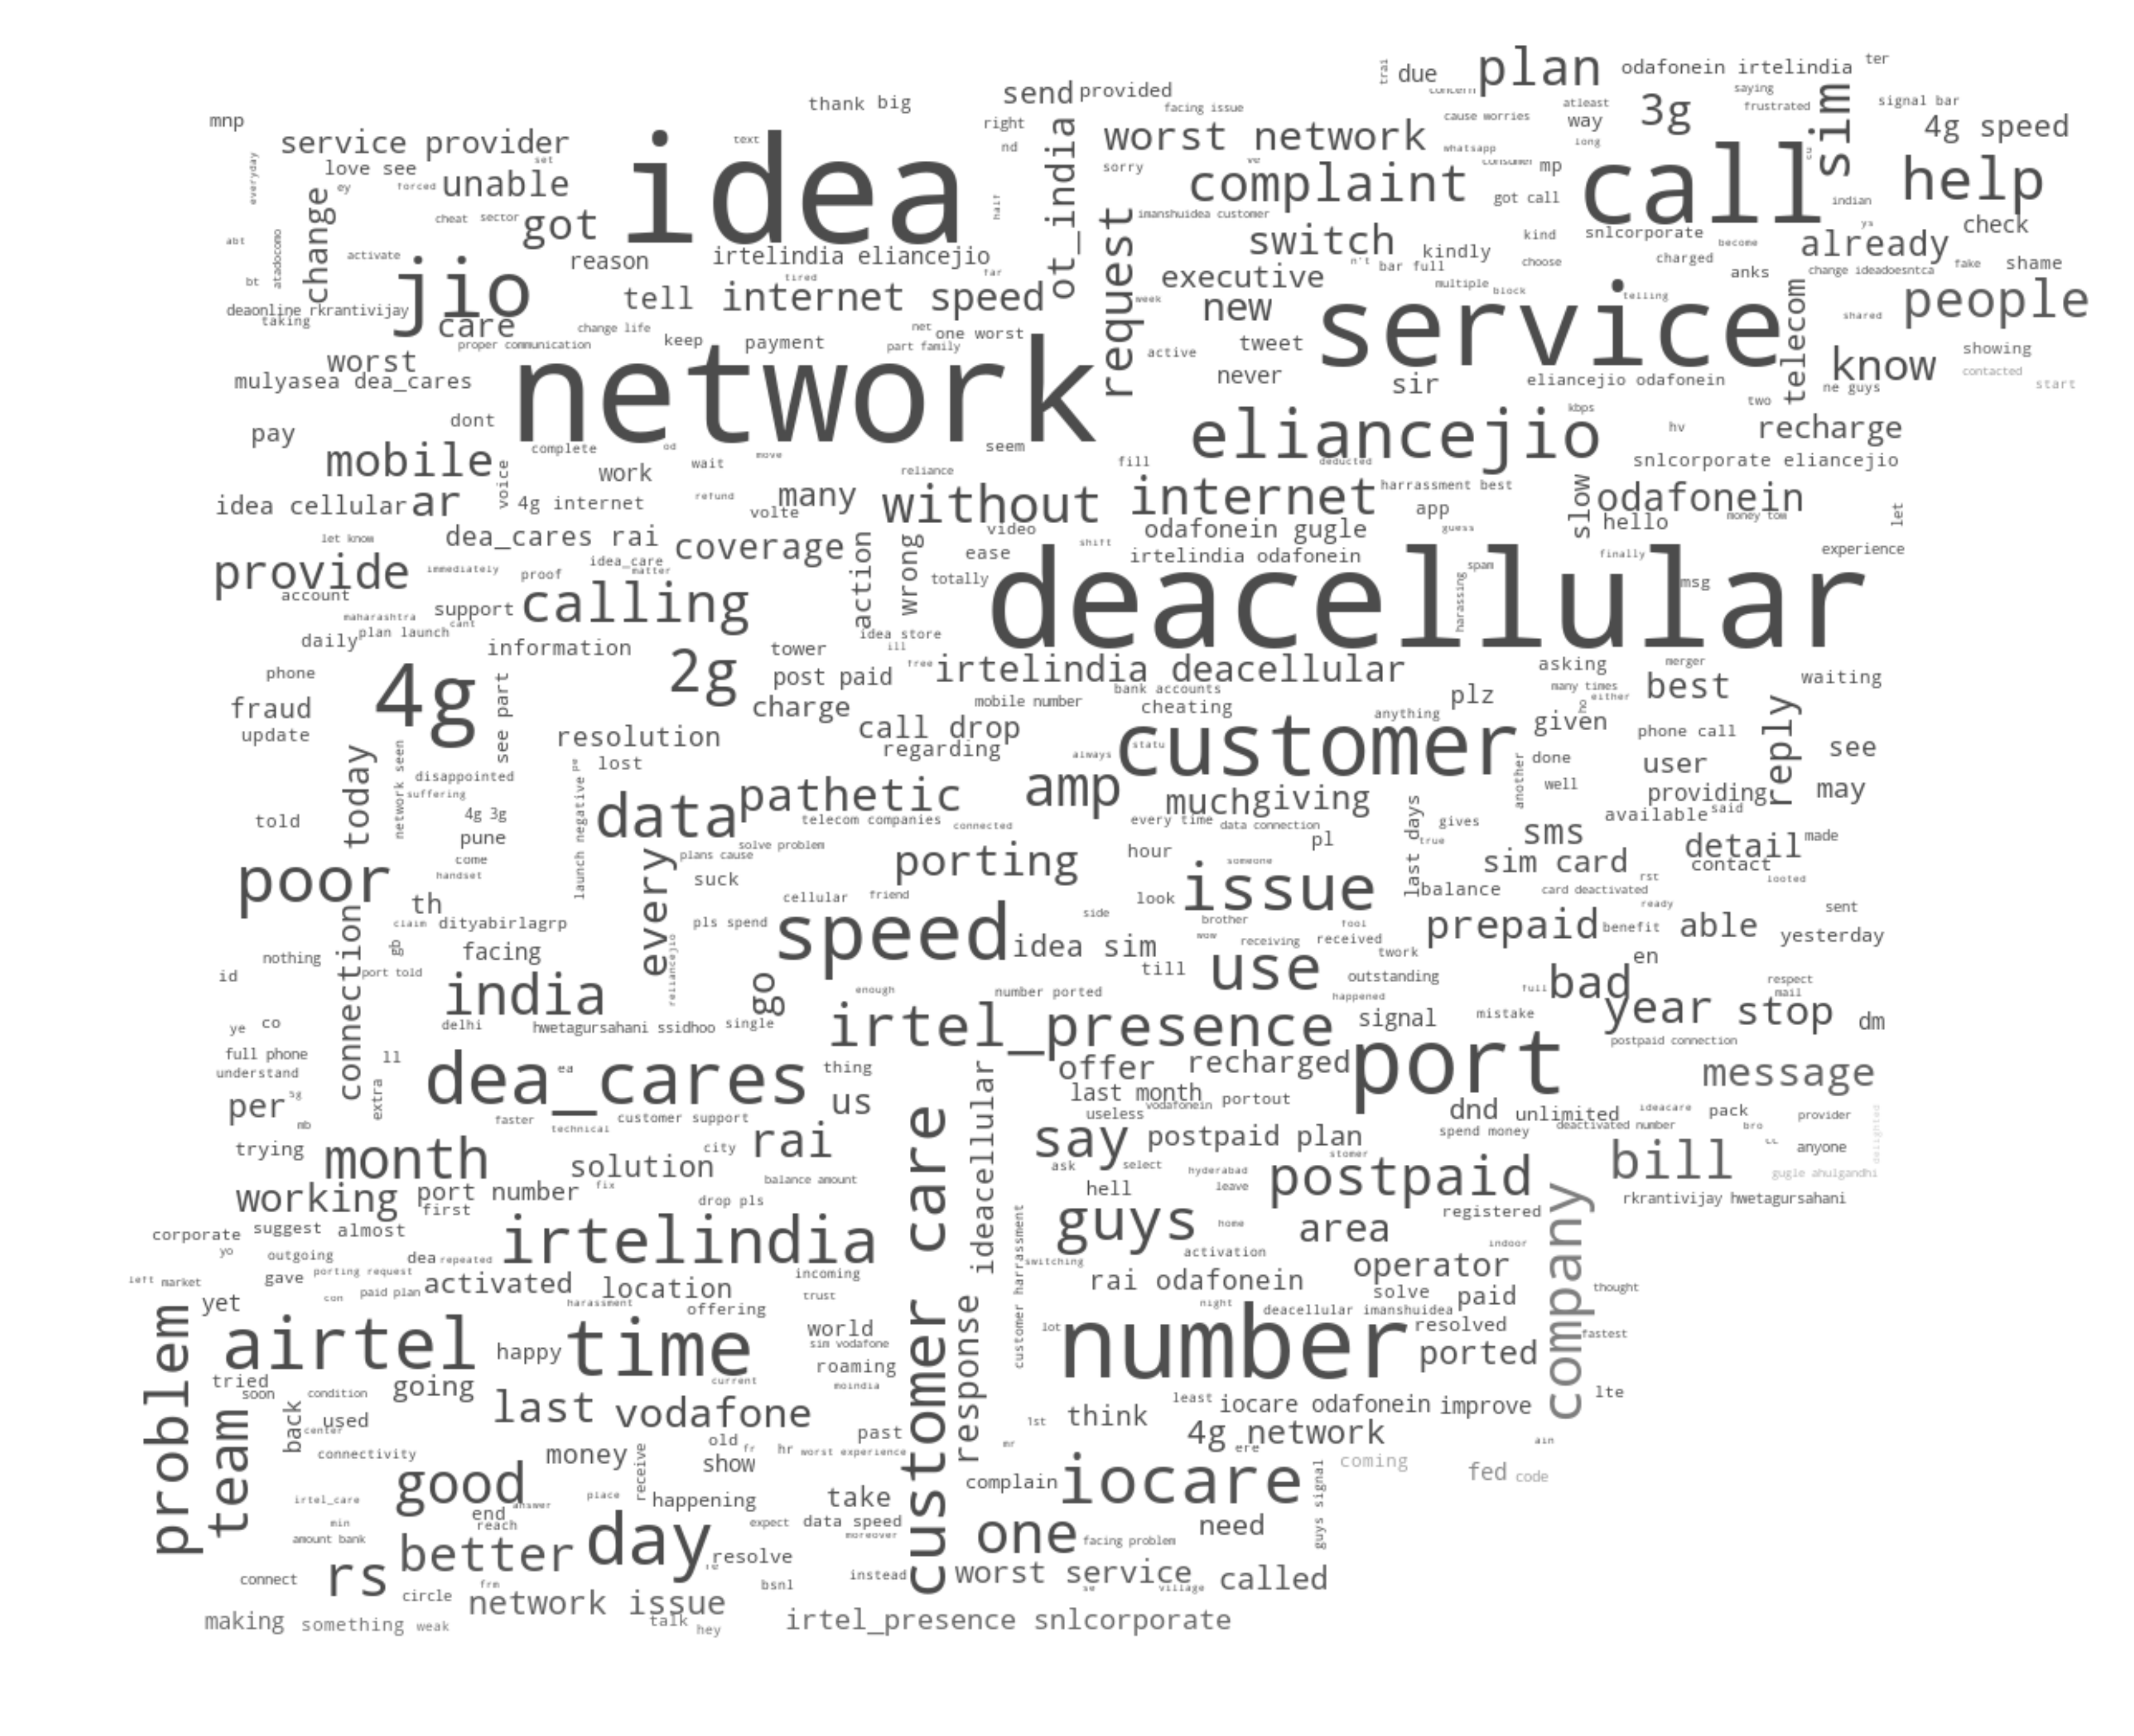

In [413]:
d = getcwd()
## join all documents in corpus
text= ''.join(str2)
stp=list(set(STOPWORDS))
w=['hi','ur','dear','rt','even','really','still','...','now','please','getting','guy','want','day','will','using','make','give']
q=w+stp

## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "test4.png")))
wc = WordCloud(background_color="white", max_words=500, mask=mask,stopwords=q,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10],dpi=400)
plt.tight_layout(pad=0)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

_=plt.show()